In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
#loading the data
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#condition of the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#extracting num columns
hf_train = df_train.copy()

for i in hf_train.columns:
    if hf_train[i].dtype=="object":
        hf_train.drop(i, axis=1, inplace=True)
hf_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [6]:
hf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [7]:
hf_test = df_test.copy()

for i in hf_test.columns:
    if hf_test[i].dtype=="object":
        hf_test.drop(i, axis=1, inplace=True)
hf_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [8]:
hf_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [9]:
#corelation between the variables
hf_train.corr().T

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
a = hf_train.nunique()
a

Id               1460
MSSubClass         15
LotFrontage       110
LotArea          1073
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
MasVnrArea        327
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       12
Fireplaces          4
GarageYrBlt        97
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
SalePrice         663
dtype: int64

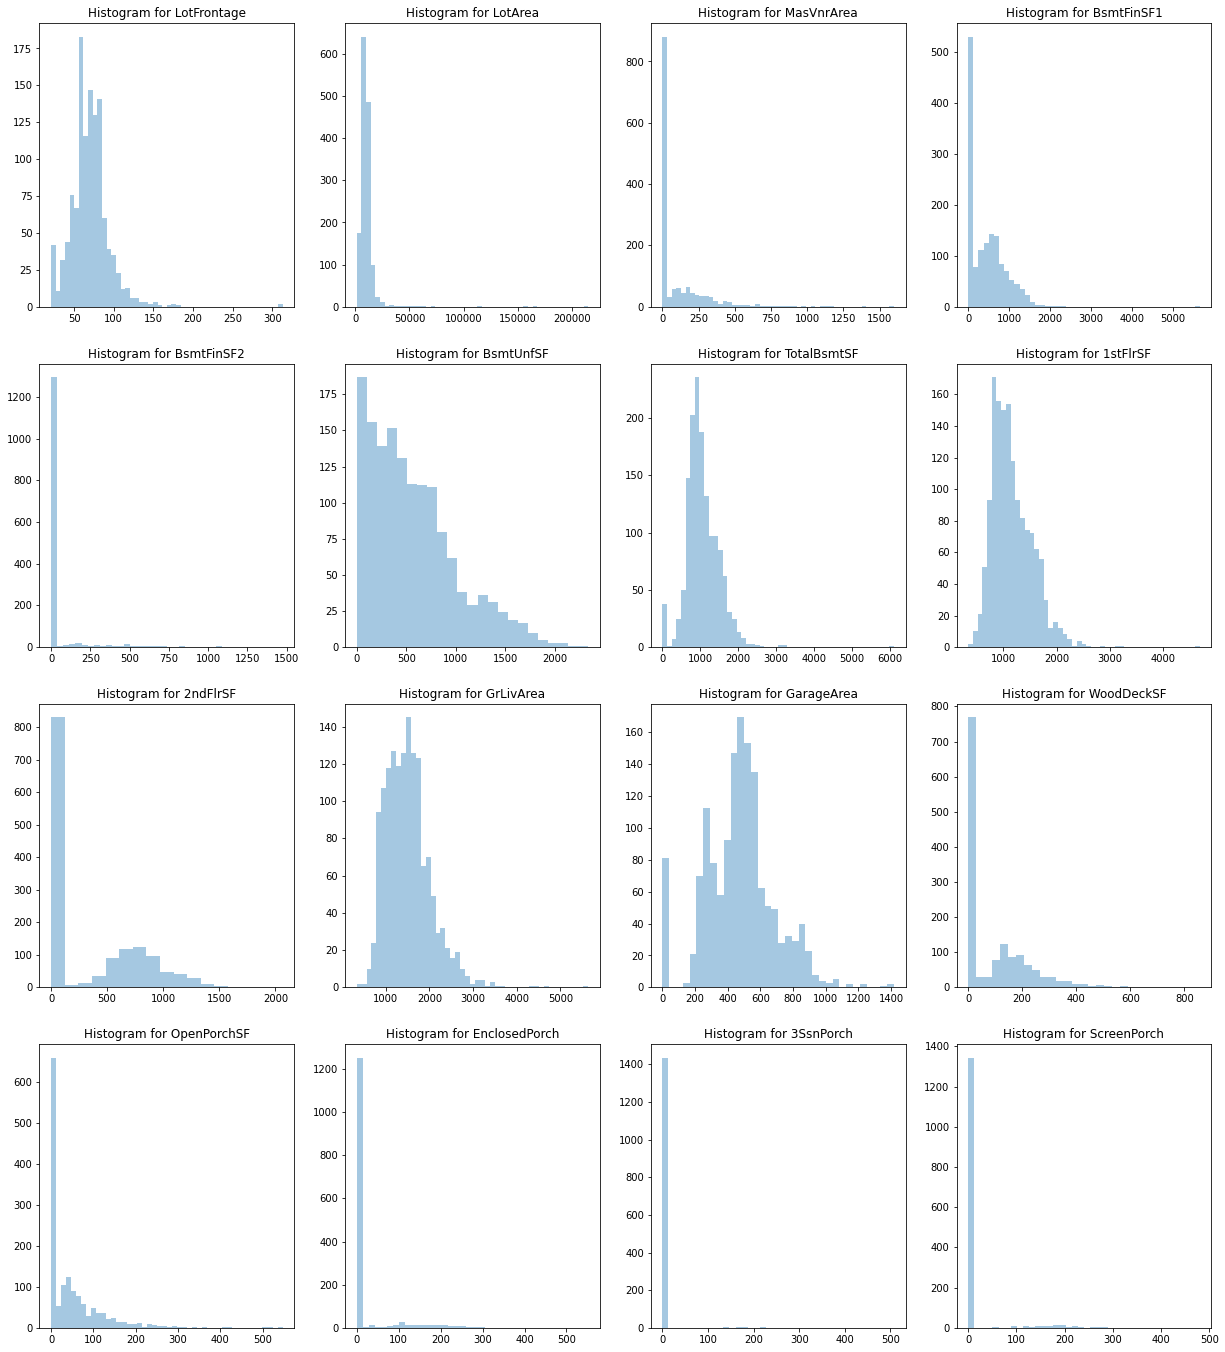

In [12]:
# seeing through continuous cols
plt.figure(figsize=(21,24))
col=1
cat_col=['Id','MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','LowQualFinSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','Fireplaces','GarageYrBlt','GarageCars','PoolArea','MiscVal','MoSold','YrSold']
for i in hf_train.columns:
    if i not in cat_col:
        if col<17:
            plt.subplot(4,4,col)
            sns.distplot(x=hf_train[i],kde=False)
            plt.title("Histogram for %s" % (i))
        col+=1

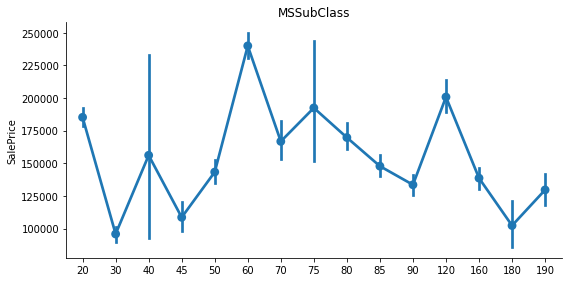

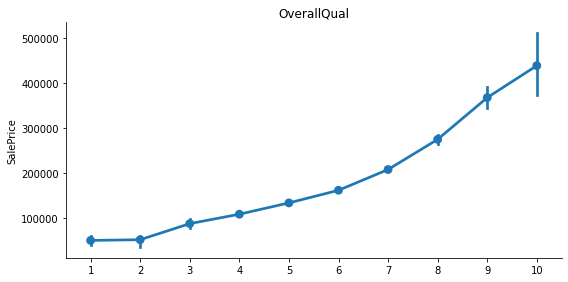

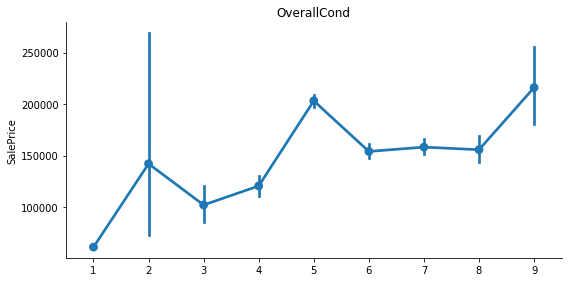

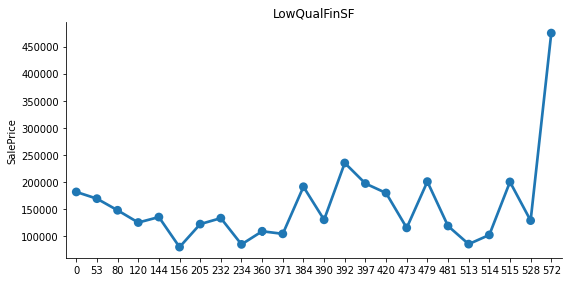

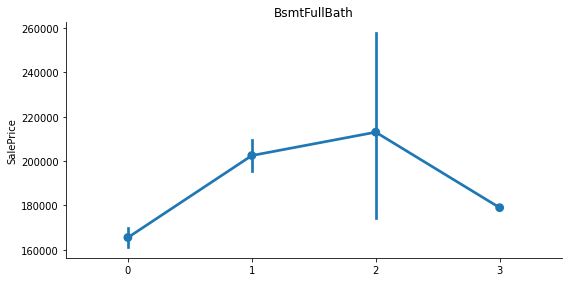

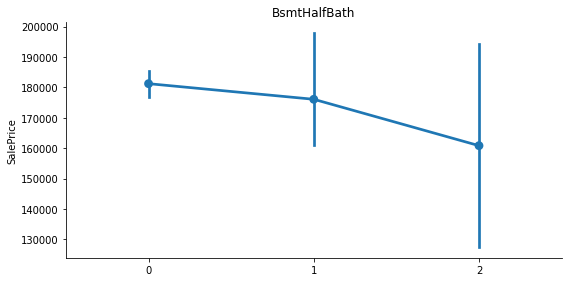

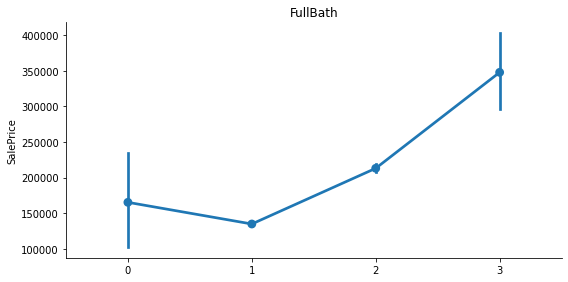

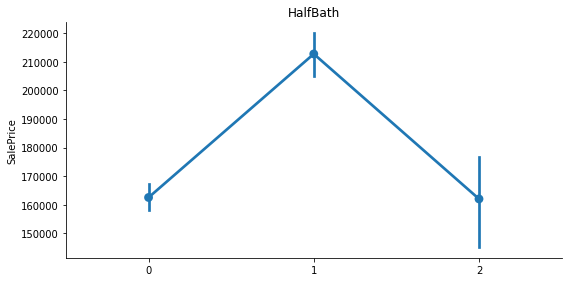

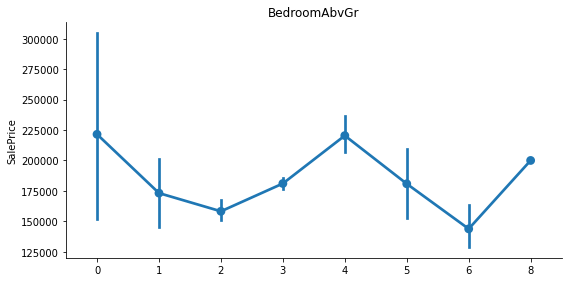

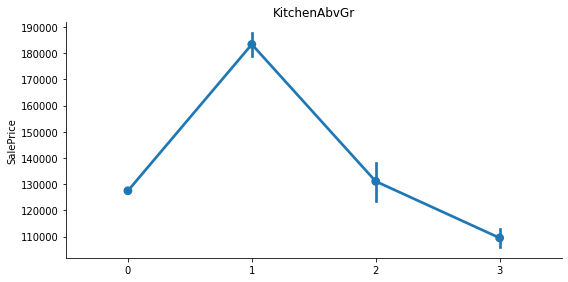

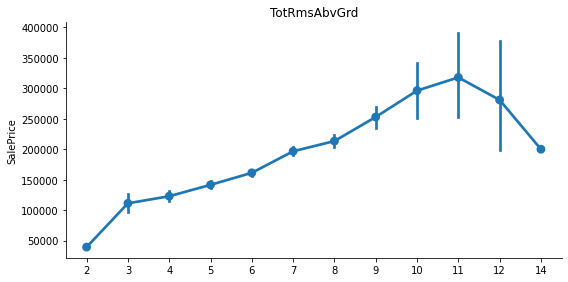

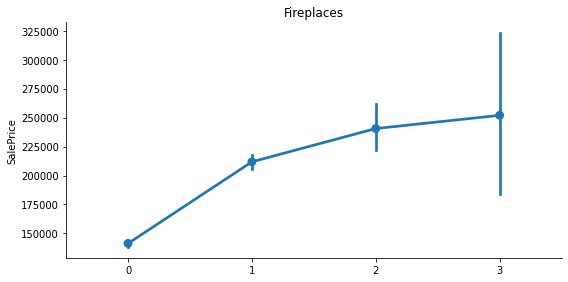

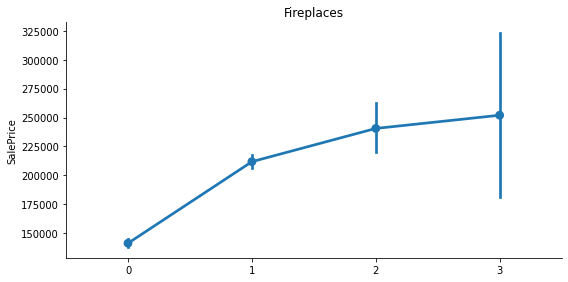

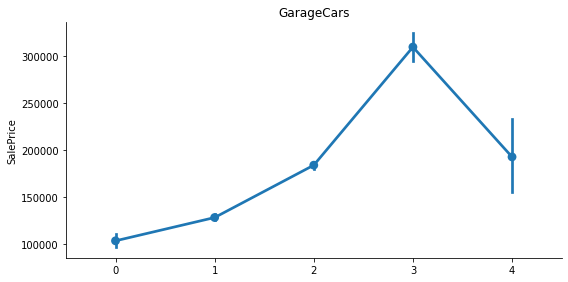

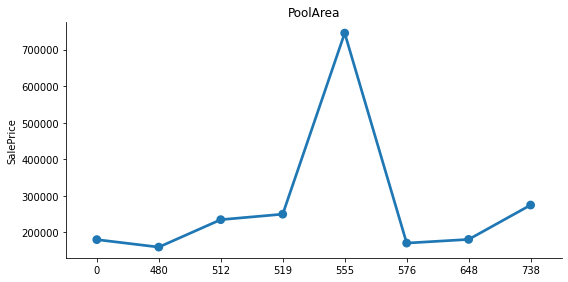

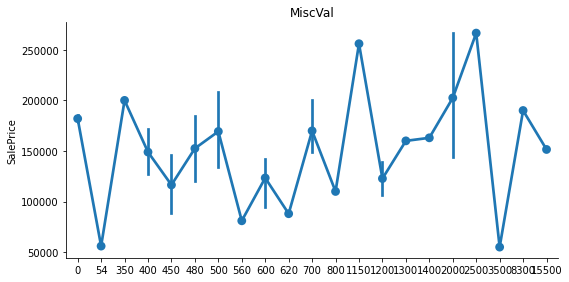

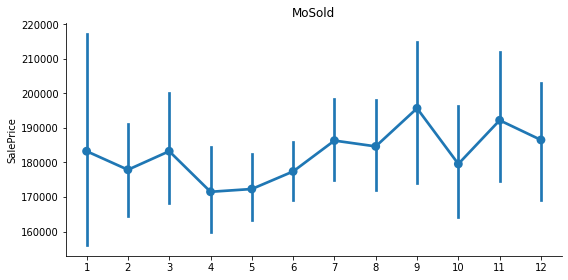

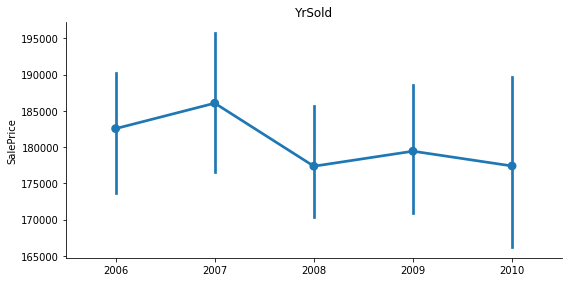

In [13]:
#categorical plots for ordinal cols
for j in cat_col:
    if j not in ['Id','YearBuilt','YearRemodAdd','GarageYrBlt']:
        sns.catplot(x=j,y='SalePrice',data=hf_train,kind="point", height=4, aspect=2).set(xlabel=None)
        plt.title(j)

In [14]:
#extracting character cols
train_cat = df_train.copy()
for i in train_cat.columns:
    if train_cat[i].dtype != 'object':
        train_cat.drop(i,axis=1,inplace=True)

In [15]:
train_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [16]:
test_cat = df_test.copy()
for i in test_cat.columns:
    if test_cat[i].dtype != 'object':
        test_cat.drop(i,axis=1,inplace=True)

In [17]:
test_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [18]:
#unique values and number of non-null values in cat cols
train_cat.describe().T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


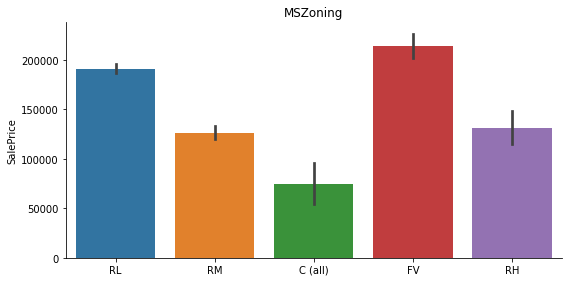

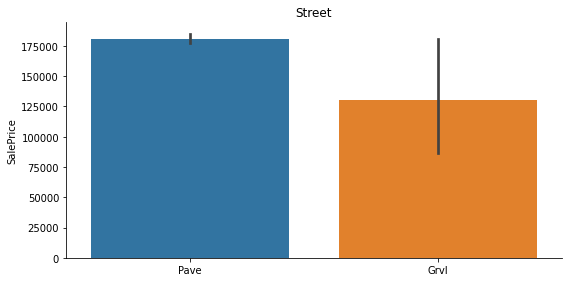

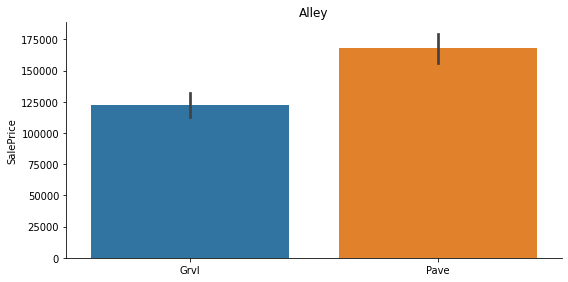

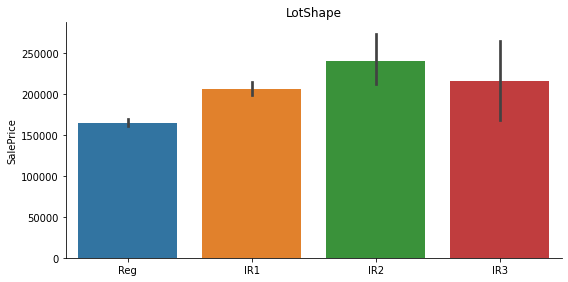

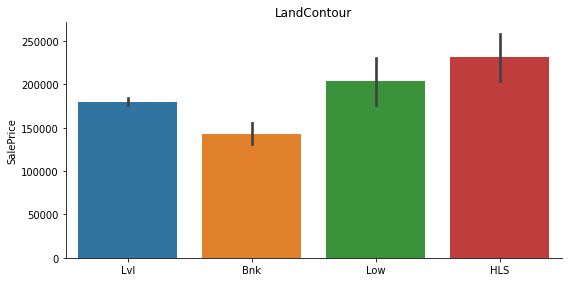

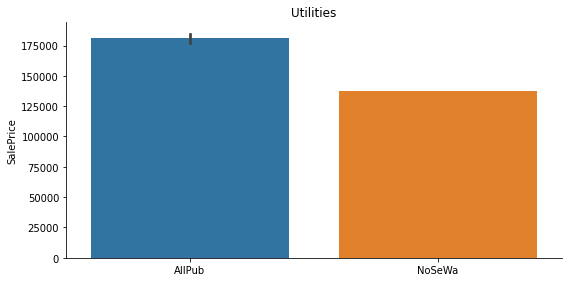

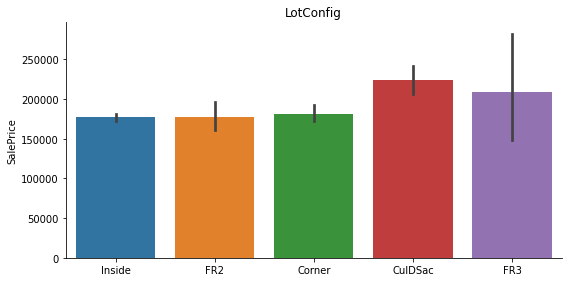

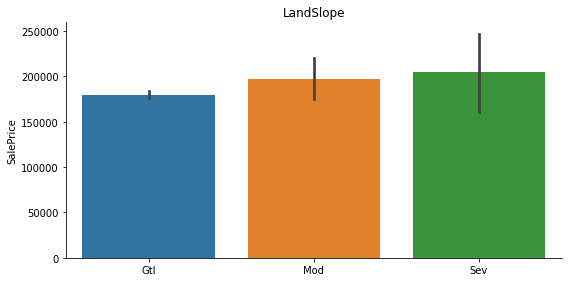

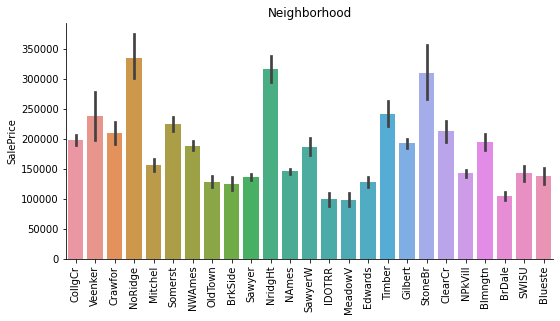

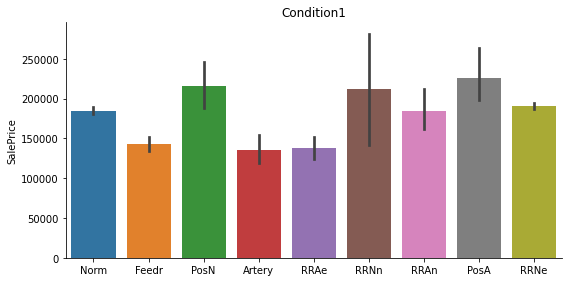

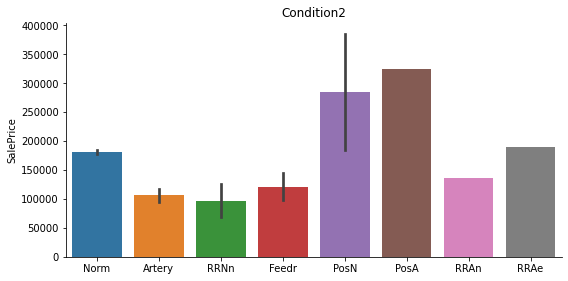

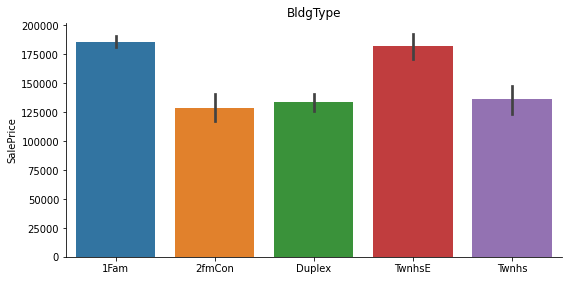

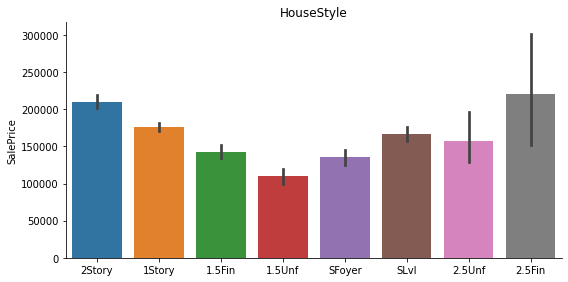

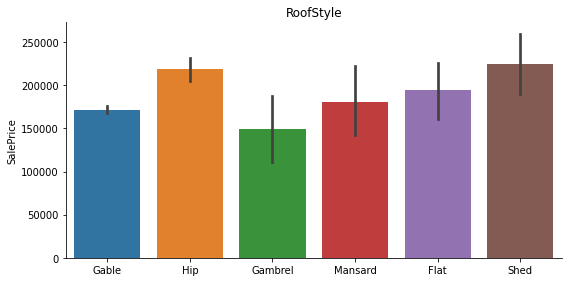

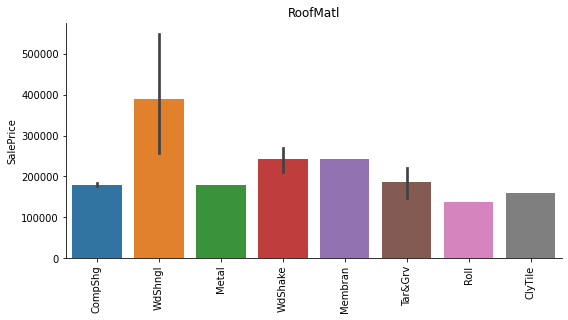

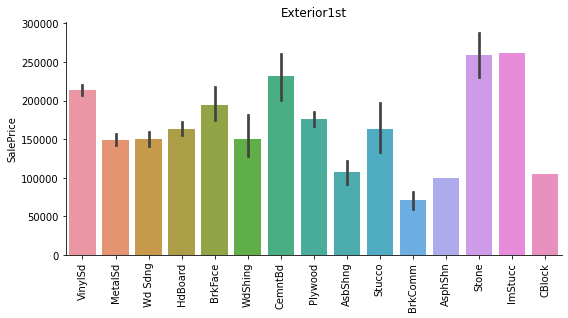

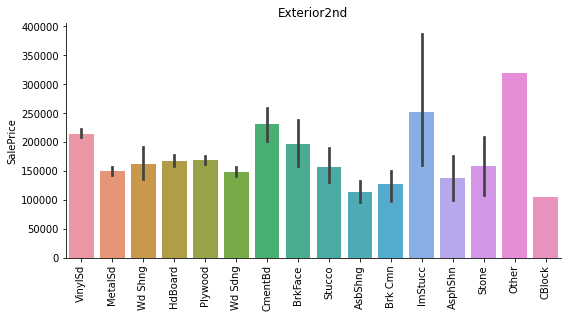

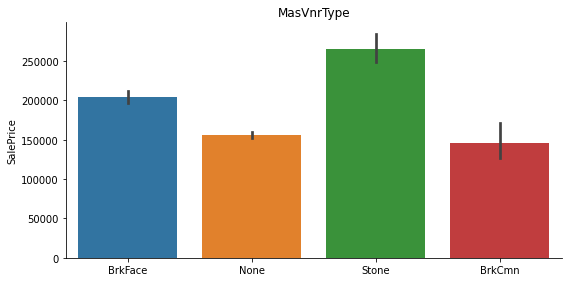

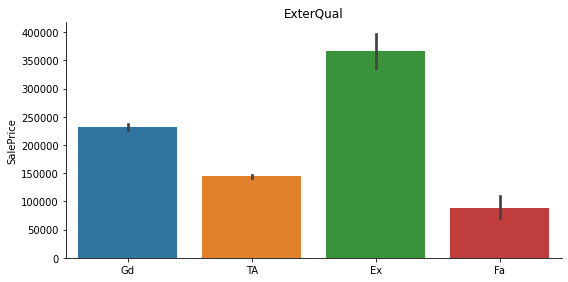

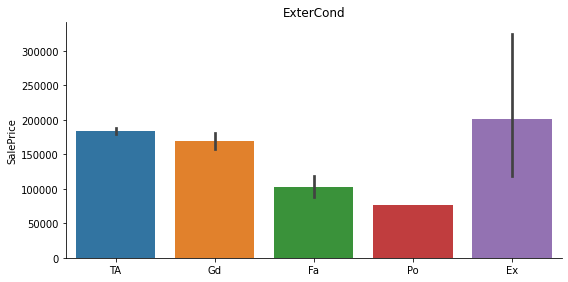

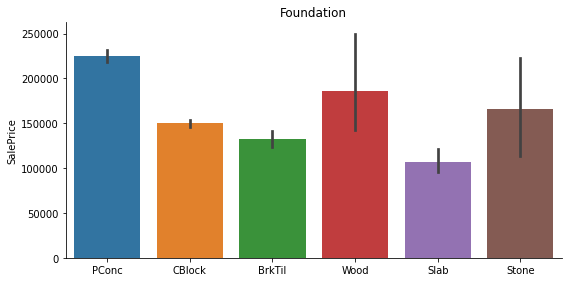

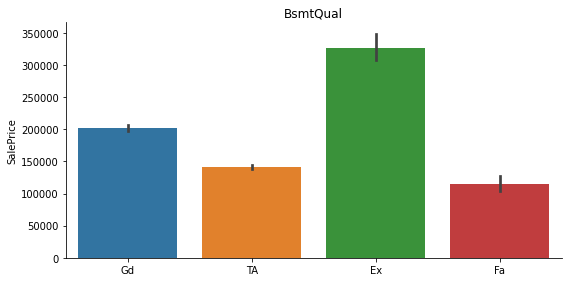

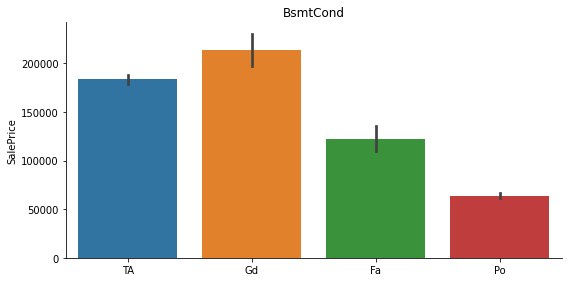

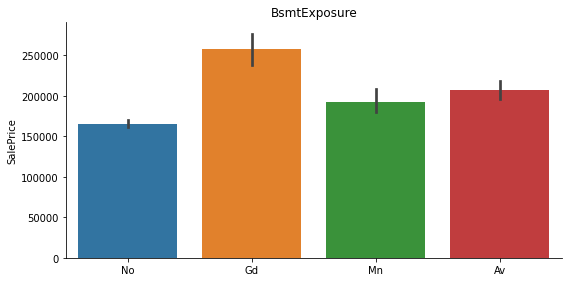

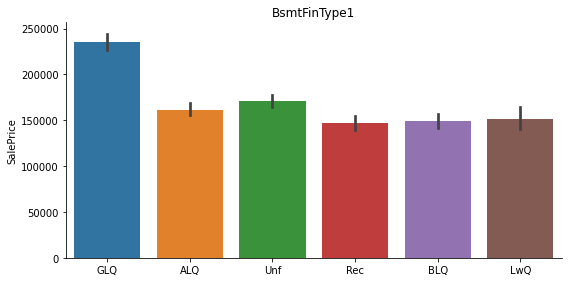

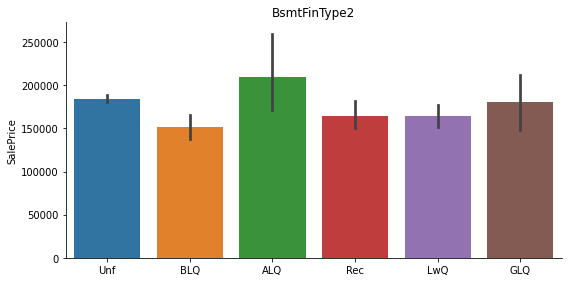

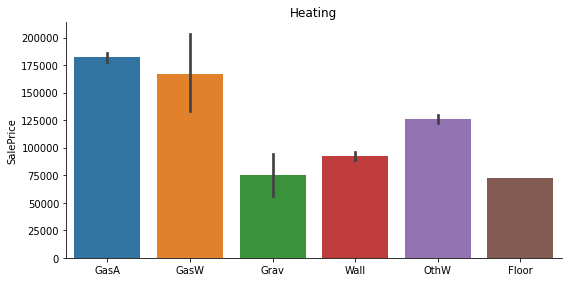

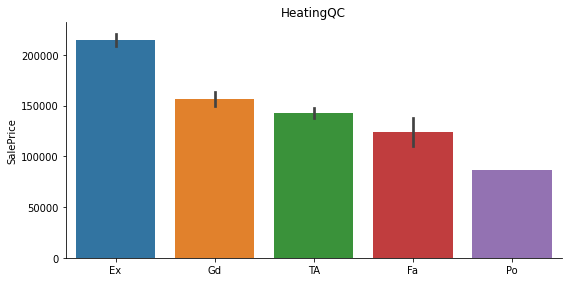

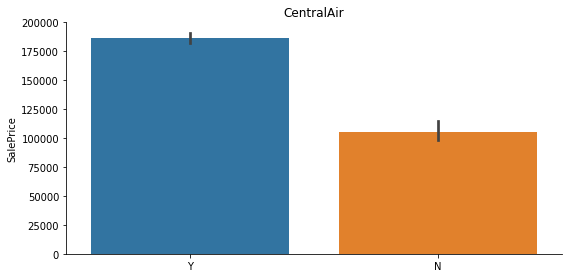

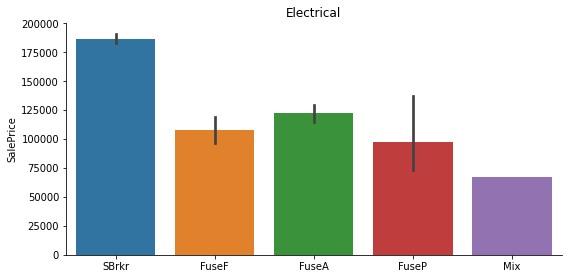

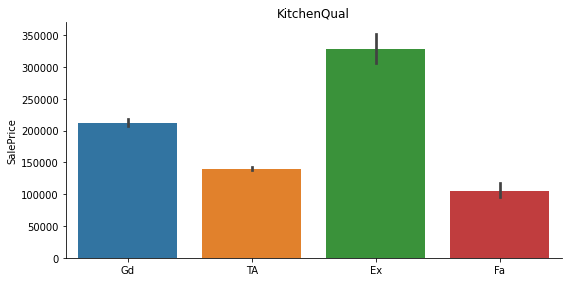

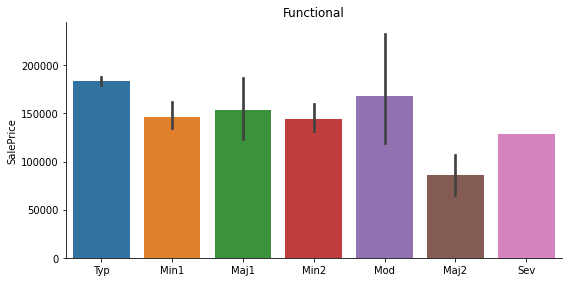

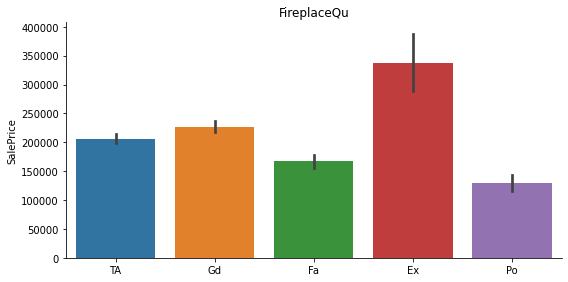

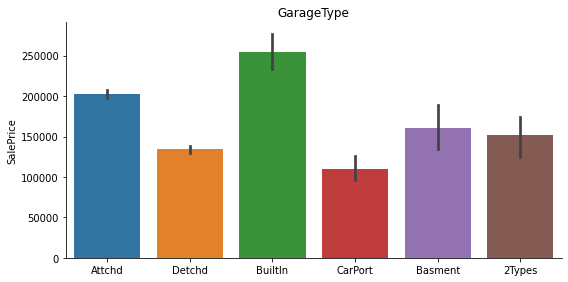

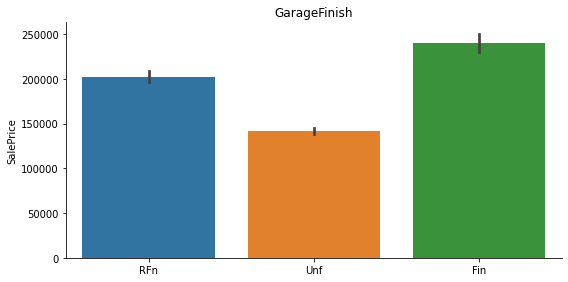

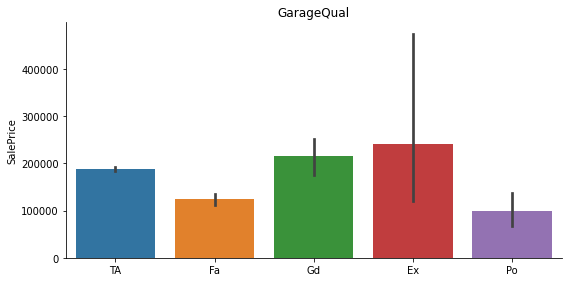

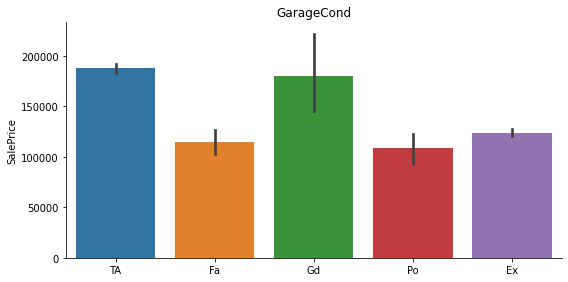

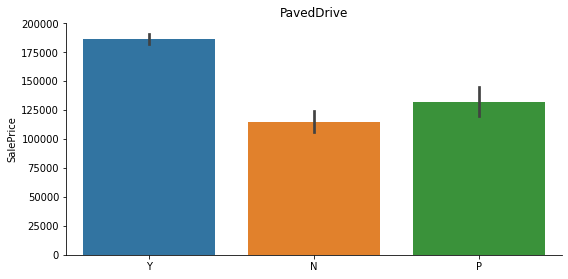

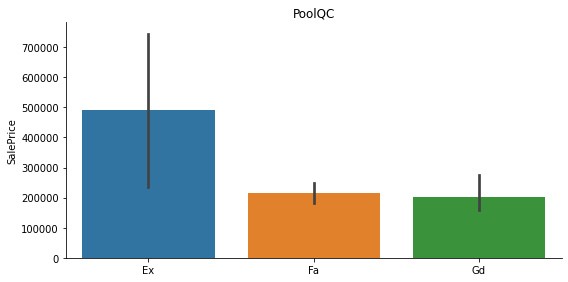

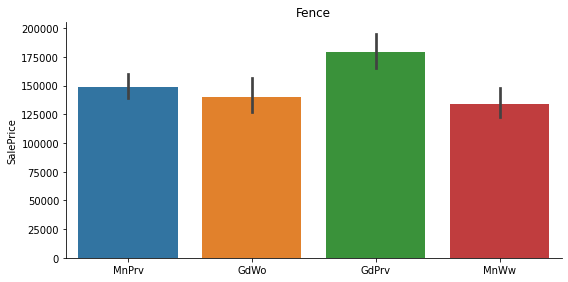

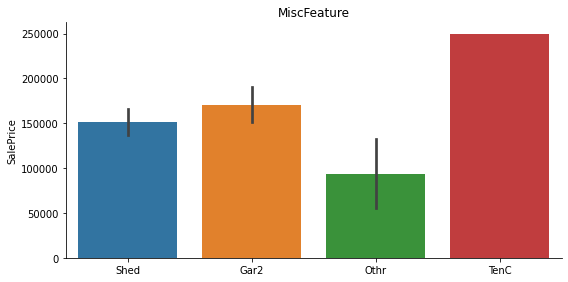

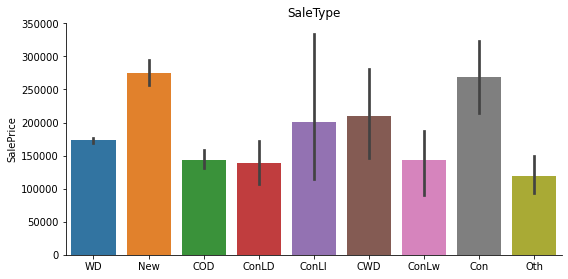

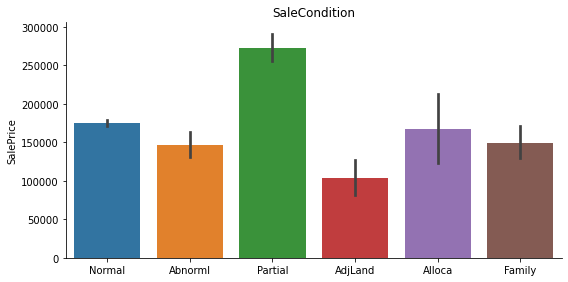

In [19]:
#finding basic relation between cat-cols and sale-price. if we have to drop them or retain
for i in train_cat.columns:
    sns.catplot(x=i,y='SalePrice',data=df_train,kind='bar',height=4,aspect=2).set(xlabel=None)
    plt.title(i)
    if i in ["Neighborhood","RoofMatl","Exterior1st","Exterior2nd"]:
        plt.xticks(rotation=90)

In [20]:
hf_train.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [21]:
#importing libraries for filling missing values in num cols
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
miss_prd = IterativeImputer(estimator=RandomForestRegressor())

In [22]:
h_train = pd.DataFrame(miss_prd.fit_transform(hf_train),columns=hf_train.columns)
h_test = pd.DataFrame(miss_prd.fit_transform(hf_test),columns=hf_test.columns)

In [23]:
h_train.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [24]:
h_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


In [25]:
h_train['GarageYrBlt']=h_train['GarageYrBlt'].apply(lambda x:round(x))
h_test['GarageYrBlt']=h_test['GarageYrBlt'].apply(lambda x:round(x))

In [26]:
h_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   OverallQual    1460 non-null   float64
 5   OverallCond    1460 non-null   float64
 6   YearBuilt      1460 non-null   float64
 7   YearRemodAdd   1460 non-null   float64
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   float64
 10  BsmtFinSF2     1460 non-null   float64
 11  BsmtUnfSF      1460 non-null   float64
 12  TotalBsmtSF    1460 non-null   float64
 13  1stFlrSF       1460 non-null   float64
 14  2ndFlrSF       1460 non-null   float64
 15  LowQualFinSF   1460 non-null   float64
 16  GrLivArea      1460 non-null   float64
 17  BsmtFullBath   1460 non-null   float64
 18  BsmtHalf

In [27]:
#converting float data into integer
for i in h_train.columns:
    h_train[i]=h_train[i].astype('int64')
for i in h_test.columns:
    h_test[i]=h_test[i].astype('int64')

In [28]:
# id do not have any contribution and alley and poolqc rows are less. drop them
h_train.drop(['Id'],axis=1,inplace=True)
train_cat.drop(['PoolQC','Alley'],axis=1,inplace=True)
test_cat.drop(['PoolQC','Alley'],axis=1,inplace=True)

In [29]:
train_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [30]:
#filling missing values with mode in categorical cols
obj_col=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition']
for i in obj_col:
    train_cat[i].fillna(train_cat[i].mode()[0],inplace=True)
    test_cat[i].fillna(test_cat[i].mode()[0],inplace=True)

In [31]:
#merging num and cat cols for data analyse
train=pd.concat([h_train,train_cat],axis=1)
test = pd.concat([h_test,test_cat],axis=1)

In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1459 non-null   int64 
 1   MSSubClass     1459 non-null   int64 
 2   LotFrontage    1459 non-null   int64 
 3   LotArea        1459 non-null   int64 
 4   OverallQual    1459 non-null   int64 
 5   OverallCond    1459 non-null   int64 
 6   YearBuilt      1459 non-null   int64 
 7   YearRemodAdd   1459 non-null   int64 
 8   MasVnrArea     1459 non-null   int64 
 9   BsmtFinSF1     1459 non-null   int64 
 10  BsmtFinSF2     1459 non-null   int64 
 11  BsmtUnfSF      1459 non-null   int64 
 12  TotalBsmtSF    1459 non-null   int64 
 13  1stFlrSF       1459 non-null   int64 
 14  2ndFlrSF       1459 non-null   int64 
 15  LowQualFinSF   1459 non-null   int64 
 16  GrLivArea      1459 non-null   int64 
 17  BsmtFullBath   1459 non-null   int64 
 18  BsmtHalfBath   1459 non-null

Mean price range:  180921.0
Standard deviation of prices:  79443.0
Median of prices:  163000.0
Mode of prices:  140000


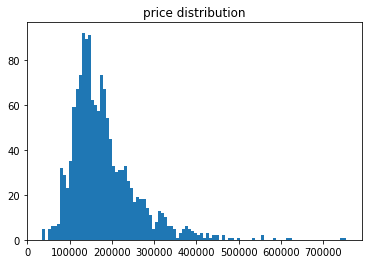

In [33]:
# price range distribution of the houses
print('Mean price range: ',round(train['SalePrice'].mean(),0))
print('Standard deviation of prices: ',round(train['SalePrice'].std(),0))
print('Median of prices: ',train['SalePrice'].median())
print('Mode of prices: ',train['SalePrice'].mode()[0])


train['SalePrice'].hist(bins=100,grid=False)
plt.title('price distribution');

In [34]:
h_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     1460 non-null   int64
 1   LotFrontage    1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   MasVnrArea     1460 non-null   int64
 8   BsmtFinSF1     1460 non-null   int64
 9   BsmtFinSF2     1460 non-null   int64
 10  BsmtUnfSF      1460 non-null   int64
 11  TotalBsmtSF    1460 non-null   int64
 12  1stFlrSF       1460 non-null   int64
 13  2ndFlrSF       1460 non-null   int64
 14  LowQualFinSF   1460 non-null   int64
 15  GrLivArea      1460 non-null   int64
 16  BsmtFullBath   1460 non-null   int64
 17  BsmtHalfBath   1460 non-null   int64
 18  FullBath       1460 non-null   int64
 19  HalfBa

In [35]:
#differentiate cols with same type of features for better understanding
area_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
            '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF',
            'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']
quality_col = ['OverallQual','ExterQual','BsmtQual','HeatingQC','KitchenQual',
               'FireplaceQu','GarageQual']
condition_col = ['OverallCond','ExterCond','BsmtCond','GarageCond']
bathroom_col = ['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']
house_style_col = ['BldgType','HouseStyle']
roof_material_col = ['RoofStyle','RoofMatl']
garage_col=['GarageType','GarageFinish','GarageCars']


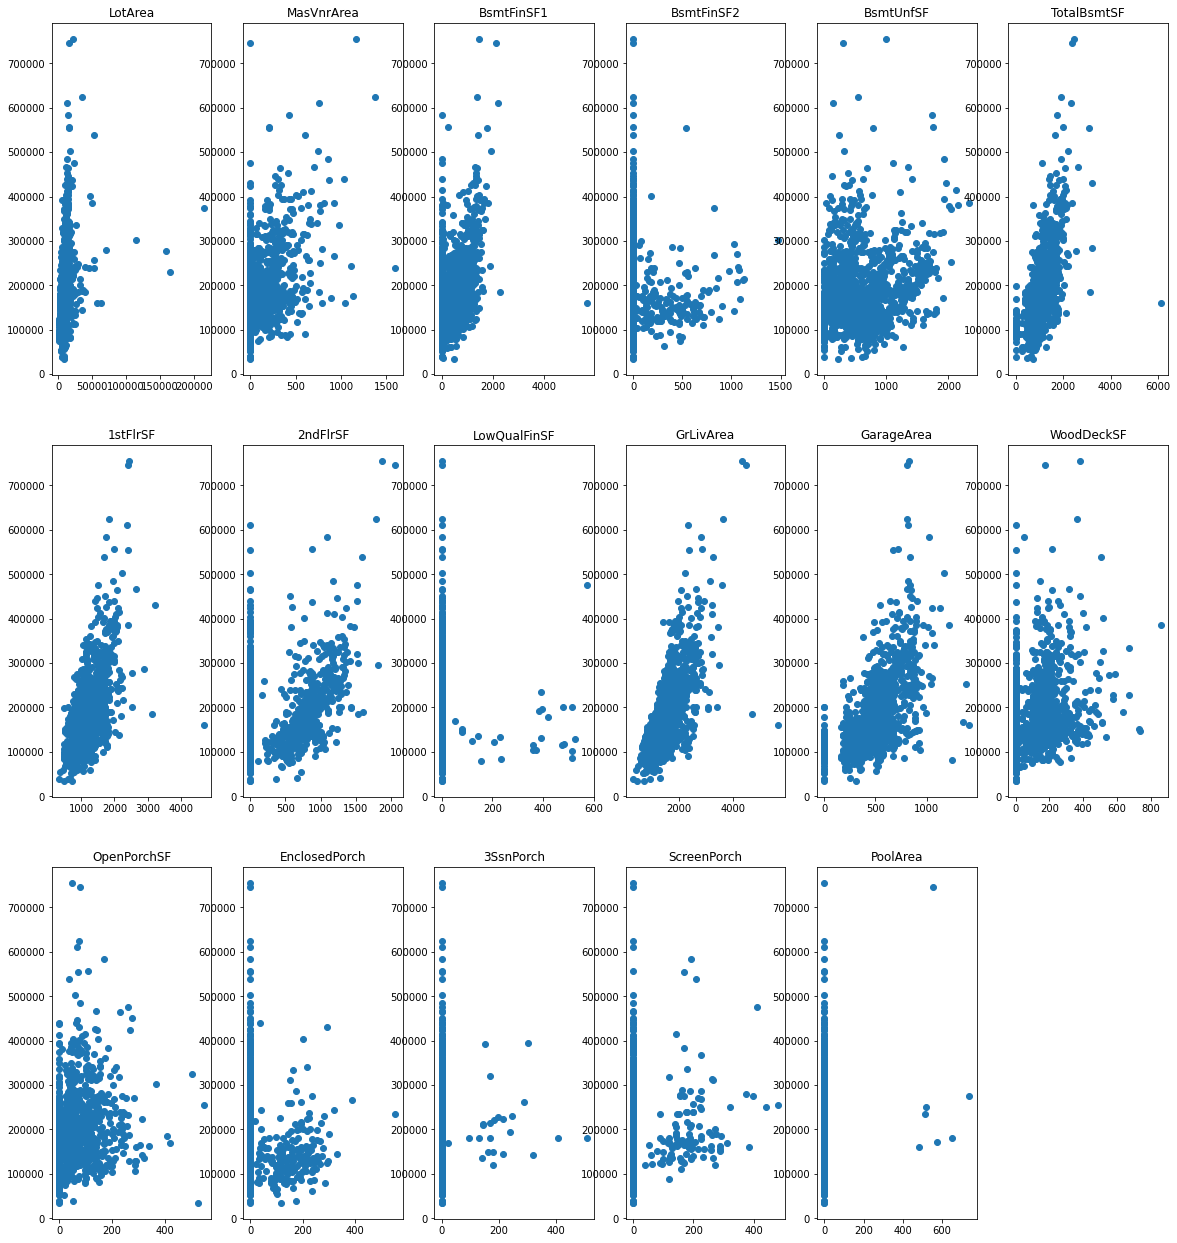

In [36]:
# saleprice to area relation
plt.figure(figsize=(20,22))
a =1
for i in area_col:
    if a!=18:
        plt.subplot(3,6,a)
        plt.scatter(x=i,y='SalePrice',data=h_train)
        plt.title(i)
    a+=1

sale price have positive relationship with areas

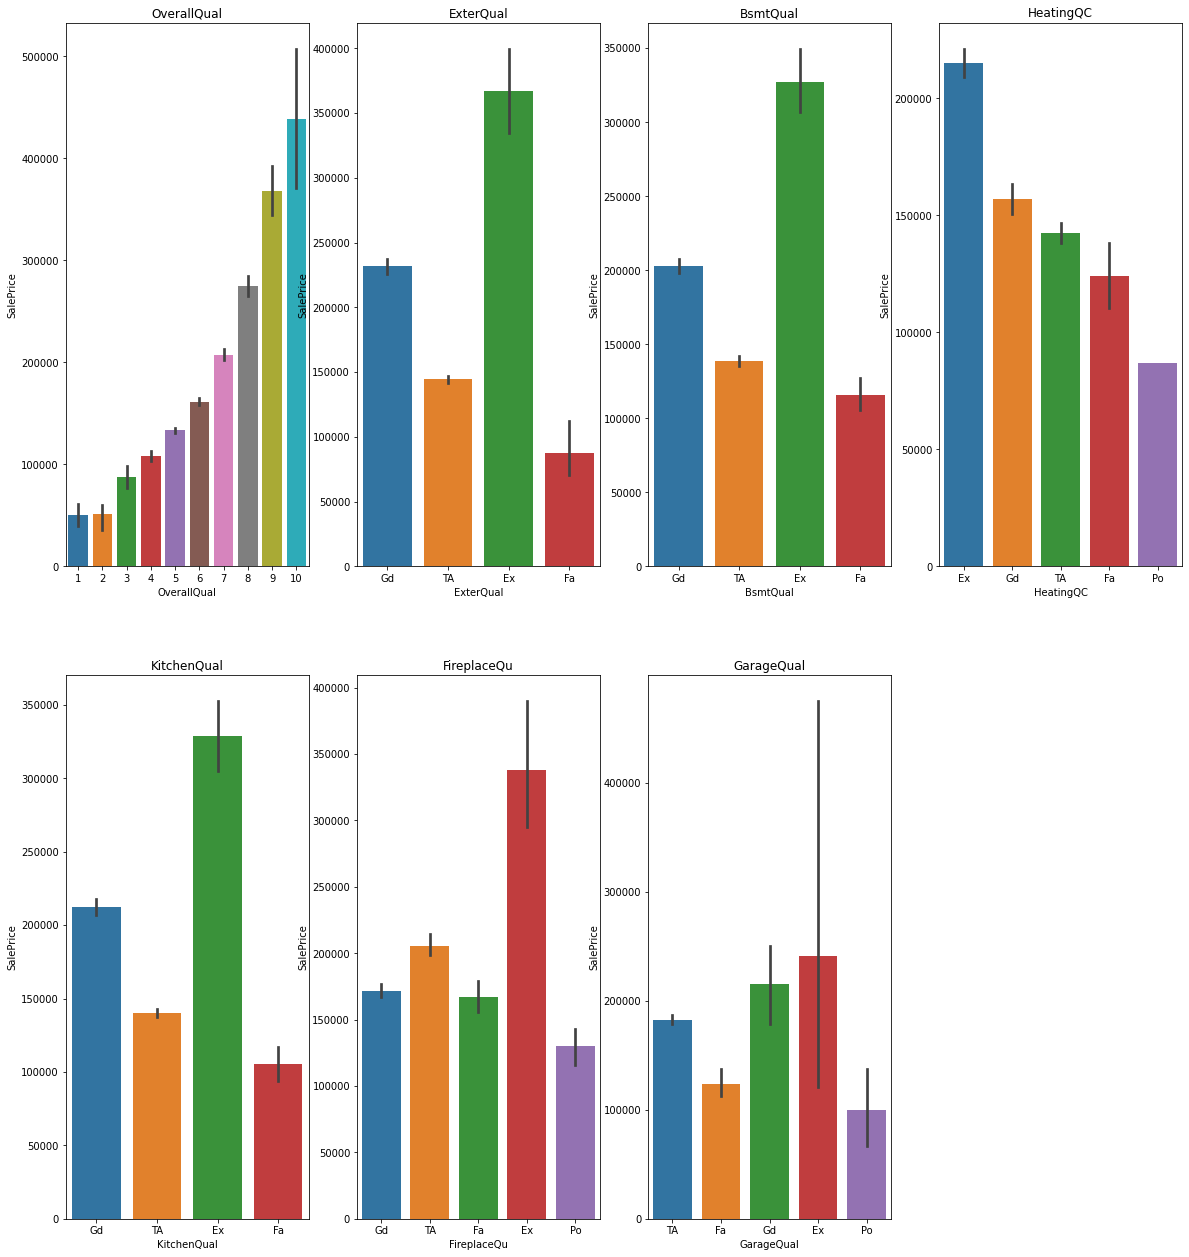

In [37]:
# saleprice to quality relation
plt.figure(figsize=(20,22))
a =1
for i in quality_col:
    if a!=8:
        plt.subplot(2,4,a)
        sns.barplot(x=i,y='SalePrice',data=train)
        plt.title(i)
    a+=1

ex or excellent quality houses are more costly

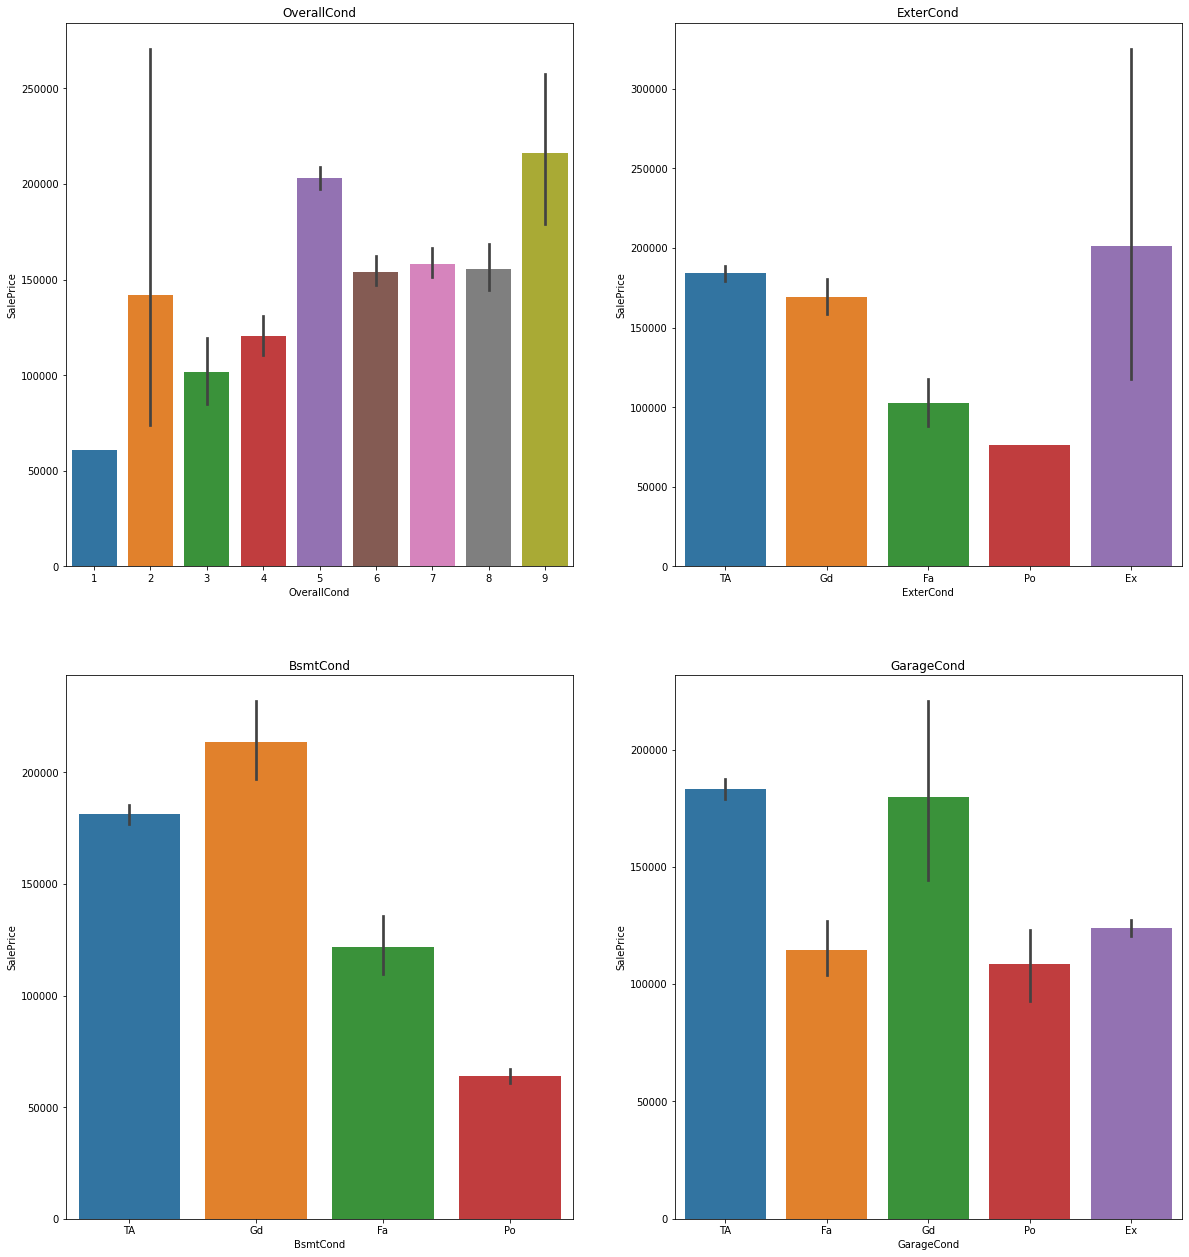

In [38]:
# saleprice to condition relation
plt.figure(figsize=(20,22))
a =1
for i in condition_col:
    if a!=5:
        plt.subplot(2,2,a)
        sns.barplot(x=i,y='SalePrice',data=train)
        plt.title(i)
    a+=1

excellent bsmt, exterior and overall are costlier but good and TA garage condition prefered then excellent

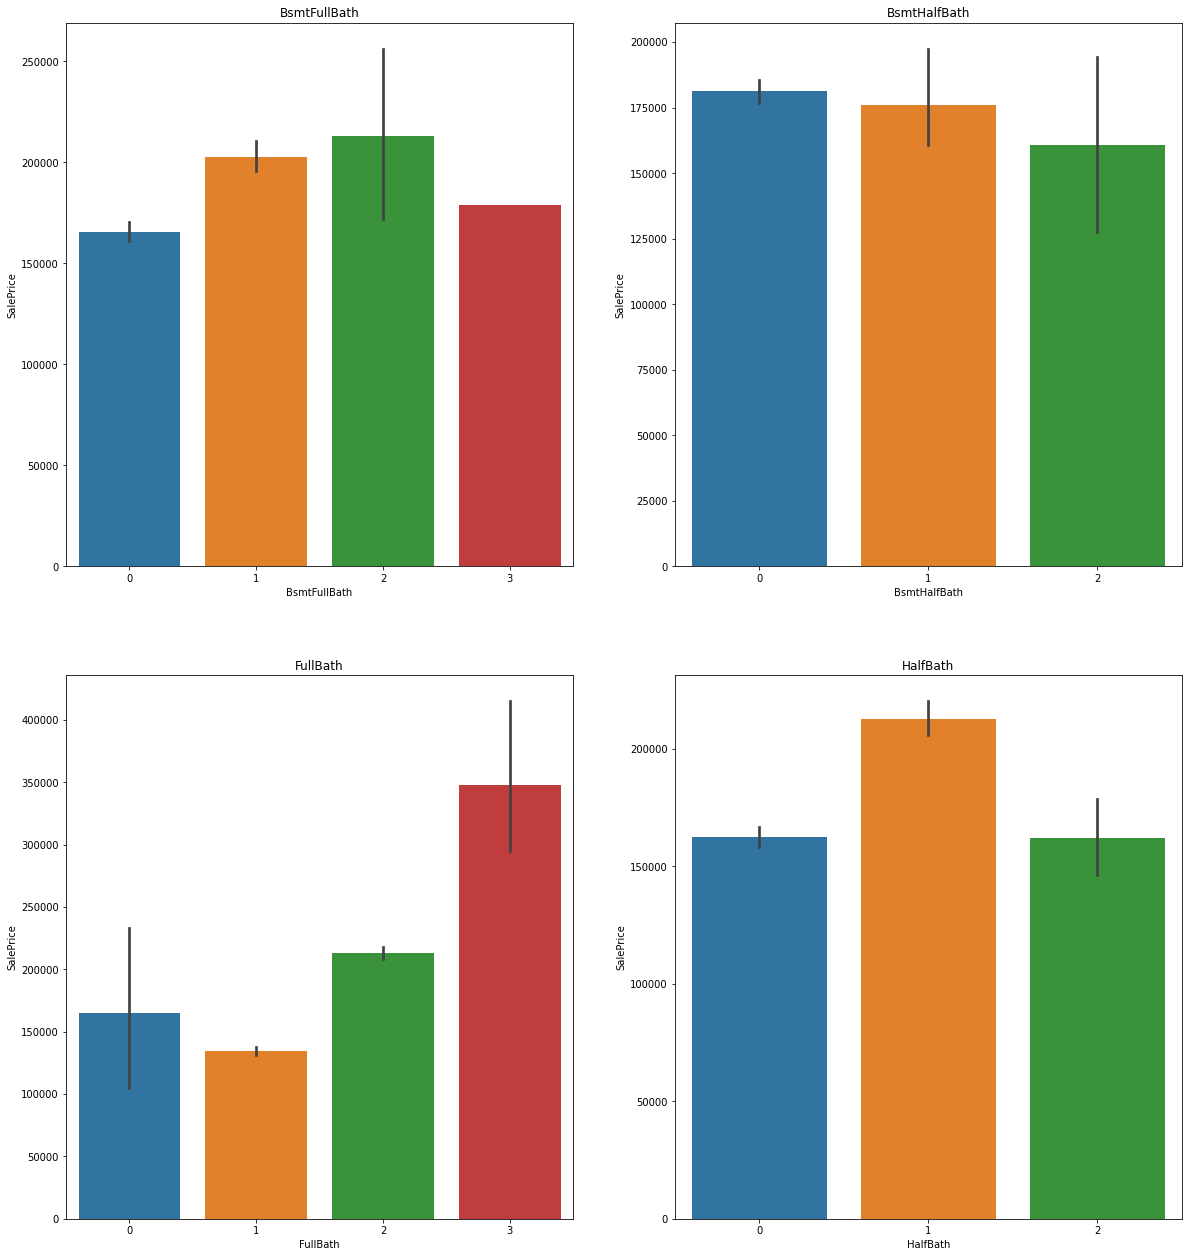

In [39]:
# saleprice to bathroom relation
plt.figure(figsize=(20,22))
a =1
for i in bathroom_col:
    if a!=5:
        plt.subplot(2,2,a)
        sns.barplot(x=i,y='SalePrice',data=train)
        plt.title(i)
    a+=1

fullbath's price are high

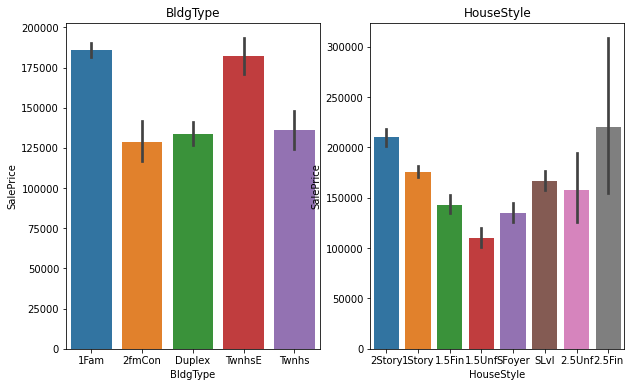

In [40]:
# saleprice to house style relation
plt.figure(figsize=(10,6))
a =1
for i in house_style_col:
    if a!=3:
        plt.subplot(1,2,a)
        sns.barplot(x=i,y='SalePrice',data=train)
        plt.title(i)
    a+=1

prices of 1Fam and 2.5Fin are high

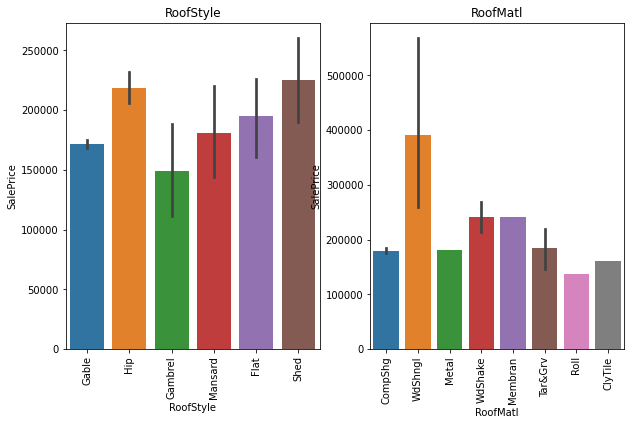

In [41]:
# saleprice to roof material relation
plt.figure(figsize=(10,6))
a =1
for i in roof_material_col:
    if a!=3:
        plt.subplot(1,2,a)
        sns.barplot(x=i,y='SalePrice',data=train)
        plt.title(i)
        plt.xticks(rotation=90)
    a+=1

prices of shed and wdshngl are very high

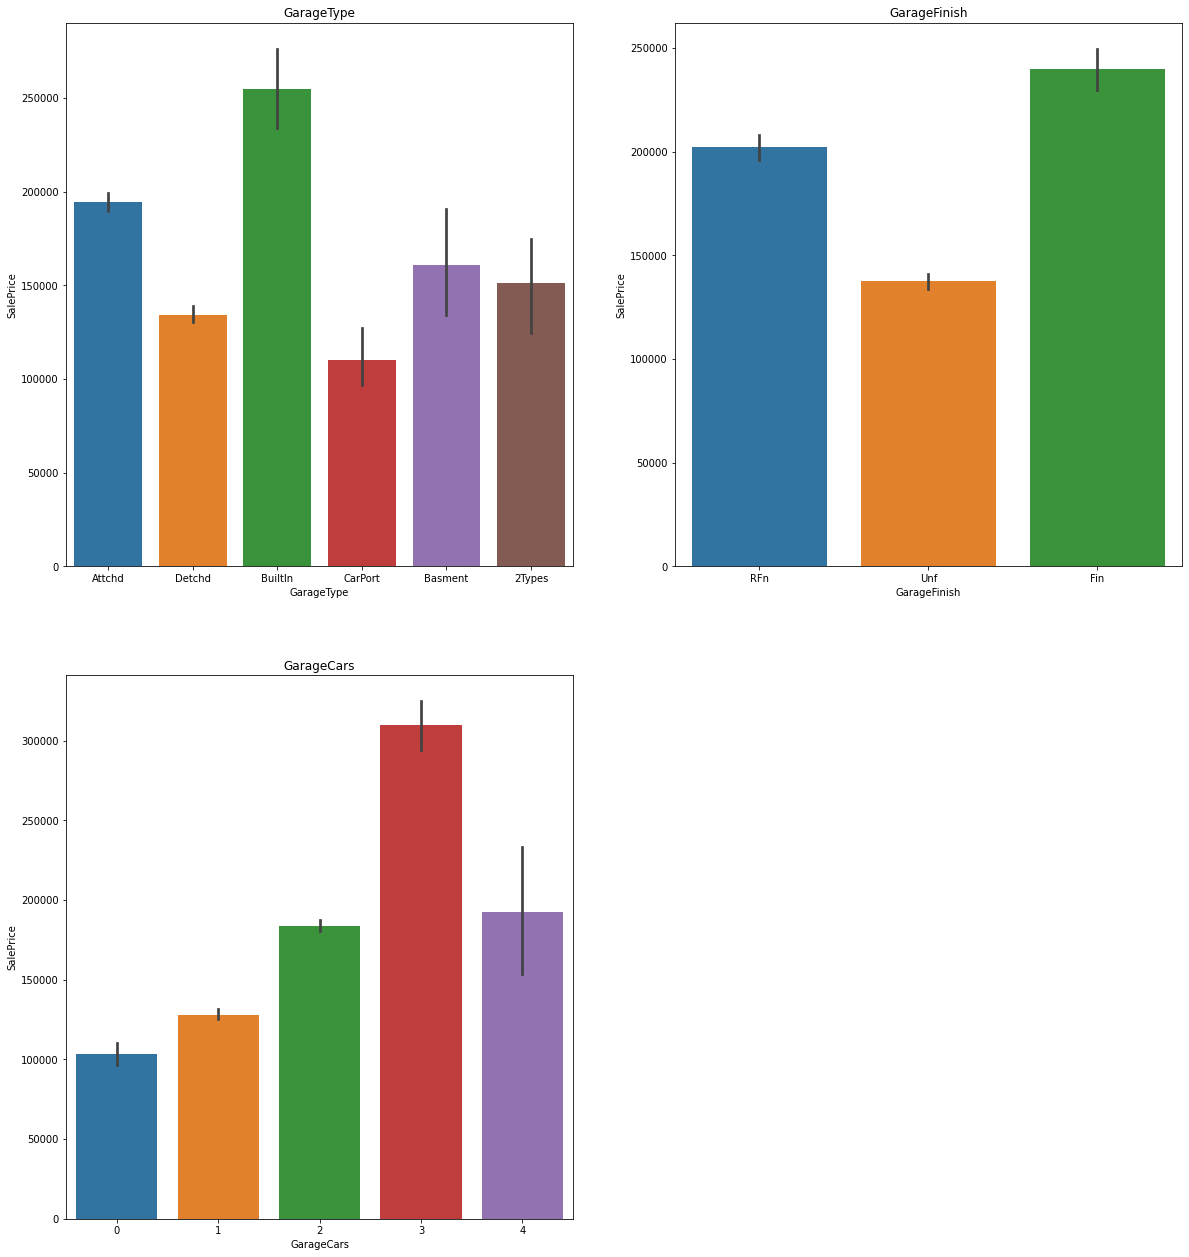

In [42]:
# saleprice to garage relation
plt.figure(figsize=(20,22))
a =1
for i in garage_col:
    if a!=4:
        plt.subplot(2,2,a)
        sns.barplot(x=i,y='SalePrice',data=train)
        plt.title(i)
        
    a+=1

builtin, fin and 3 cars garage are costlier

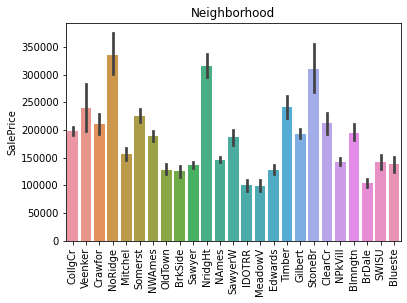

In [43]:
# saleprice to neighborhood relation
sns.barplot(x='Neighborhood', y='SalePrice', data=train).set(xlabel=None)
plt.title('Neighborhood')
plt.xticks(rotation=90);

Noridge, NridgHt, stoneBr neighborhood prices are very high


In [44]:
t = train.copy()
int_col =[]
for i in t.columns:
    if t[i].dtype=='int64':
        int_col.append(i)

In [45]:

for j in train.columns:
    if j in int_col:
        print(j,'skew value = ',train[j].skew());
        

MSSubClass skew value =  1.4076567471495591
LotFrontage skew value =  1.956874186795258
LotArea skew value =  12.207687851233496
OverallQual skew value =  0.2169439277628693
OverallCond skew value =  0.6930674724842182
YearBuilt skew value =  -0.613461172488183
YearRemodAdd skew value =  -0.5035620027004709
MasVnrArea skew value =  2.670883123778489
BsmtFinSF1 skew value =  1.685503071910789
BsmtFinSF2 skew value =  4.255261108933303
BsmtUnfSF skew value =  0.9202684528039037
TotalBsmtSF skew value =  1.5242545490627664
1stFlrSF skew value =  1.3767566220336365
2ndFlrSF skew value =  0.8130298163023265
LowQualFinSF skew value =  9.011341288465387
GrLivArea skew value =  1.3665603560164552
BsmtFullBath skew value =  0.596066609663168
BsmtHalfBath skew value =  4.103402697955168
FullBath skew value =  0.036561558402727165
HalfBath skew value =  0.675897448233722
BedroomAbvGr skew value =  0.21179009627507137
KitchenAbvGr skew value =  4.488396777072859
TotRmsAbvGrd skew value =  0.676340

it seems like variables have skewed data. so we perform iqr method to identify outliers and perform capping to remove those outliiers

In [46]:
def outlier(data):
    
    for i in data.columns:
        if data[i].dtype=='int64':
            p25 = train[i].quantile(0.25)
            p75 = train[i].quantile(0.75)
            iqr = p75-p25
            upper = p75 + 1.5*iqr
            lower = p25 - 1.5*iqr
            data[i] = np.where(
            data[i]>upper,
            upper,
            np.where(
            data[i]<lower,
            lower,
            data[i]))
outlier(h_train)

            
            

In [47]:
#yeo-johnson power transformatoin on the continuous data though it is skewed
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
p_train = pd.DataFrame(pt.fit_transform(h_train),columns=h_train.columns)
p_test = pd.DataFrame(pt.fit_transform(h_test),columns=h_test.columns)

In [48]:
# convert categorical features to numeric
from sklearn.preprocessing import LabelEncoder
for col in train_cat.columns:
    lt = LabelEncoder()
    train_cat[col] = lt.fit_transform(train_cat[col])
for col in test_cat.columns:
    lt = LabelEncoder()
    test_cat[col] = lt.fit_transform(test_cat[col])
    

In [49]:
#merging processed num and cat cols for modeling
final_train=pd.concat([p_train,train_cat],axis=1)
final_test = pd.concat([p_test,test_cat],axis=1)

In [50]:
final_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'MSZoning', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical'

test dataset does not contain SalePrice column. so we have split train dataset into train and test.

In [51]:
# splitting data into train, test, val sets
from sklearn.model_selection import train_test_split,KFold
x = final_train.drop(['SalePrice'],axis=1)
y = final_train['SalePrice']

In [52]:
kfold = KFold(n_splits=5)
for train_index,test_index in kfold.split(x):
    x_train,x_test = x.iloc[train_index],x.iloc[test_index]
    y_train,y_test = y.iloc[train_index],y.iloc[test_index]
    x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,test_size=0.5,random_state=42)

In [53]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
features = x_train.columns

x_train[features]=scale.fit_transform(x_train)
x_test[features]=scale.transform(x_test)
x_val[features]=scale.transform(x_val);

In [54]:
# performing linear regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

parameters = {
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'positive':[True,False]
}
lr_x = GridSearchCV(LinearRegression(),parameters,cv=5)
lr_x.fit(x_train,y_train)
lr = lr_x.best_estimator_
lr.fit(x_train,y_train)
pred = lr.predict(x_val)
lr_r2  = r2_score(y_val,pred)


In [55]:
#Random forest regression
from sklearn.ensemble import RandomForestRegressor
parameters = {
    'max_depth':[2,4,8,16,32],
    'n_estimators':[5,50,250,500]
}
rf_x = GridSearchCV(RandomForestRegressor(),parameters,cv=5)
rf_x.fit(x_train,y_train)
rf = rf_x.best_estimator_
rf.fit(x_train,y_train)
pred = rf.predict(x_val)
rf_r2= r2_score(y_val,pred)
print(rf_r2)

0.8650703621356517


In [56]:
# gradient boosting
from sklearn.ensemble import GradientBoostingRegressor
parameters = {
    'learning_rate':[0.01,0.1,1.0,10],
    'max_depth':[2,4,8,16,32],
    'n_estimators':[5,50,250,500]
}
gb_x = GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)
gb_x.fit(x_train,y_train.values.ravel())
gb = gb_x.best_estimator_
gb.fit(x_train,y_train.values.ravel())
pred = gb.predict(x_val)
gb_r2 = r2_score(y_val,pred)
print(gb_r2)

0.8825146400389763


In [57]:
# ridge
from sklearn.linear_model import Ridge
parameters = {
    'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'positive':[True,False],
    'solver':['svd','cholesky','lsqr','sparse_cg','sag','saga','lbfgs']
}
rg_x = GridSearchCV(Ridge(),parameters,cv=5)
rg_x.fit(x_train,y_train)
rg = rg_x.best_estimator_
rg.fit(x_train,y_train)
pred = rg.predict(x_val)
rg_r2 = r2_score(y_val,pred)
print(rg_r2)

0.8321725569439737


In [58]:
# decision tree regression
from sklearn.tree import DecisionTreeRegressor
parameters = {
    'max_depth':[2,4,8,16,32],
    'min_samples_leaf':[2,4,8,16,32],
    'min_samples_split':[2,4,8,16,32],
    'splitter':["best","random"]
}
dt_x = GridSearchCV(DecisionTreeRegressor(),parameters,cv=5)
dt_x.fit(x_train,y_train)
dt = dt_x.best_estimator_
dt.fit(x_train,y_train)
pred = dt.predict(x_val)
dt_r2 = r2_score(y_val,pred)
print(dt_r2)

0.773237347489962


In [59]:
#stacking regression
from sklearn.ensemble import StackingRegressor
parameters = {
    'passthrough':[True,False]
}
z = [('lr',lr),('rf',rf),('gb',gb),('rg',rg),('dt',dt)]
st_x = GridSearchCV(StackingRegressor(estimators=z,final_estimator=gb),parameters,cv=5)
st_x.fit(x_train,y_train)
st = st_x.best_estimator_
st.fit(x_train,y_train)
pred = st.predict(x_val)
st_r2 = r2_score(y_val,pred)
print(st_r2)

0.8850615067330091


By comparing different machine learning models based on r2 score it is found that Stacking regressor works best for this dataset

saleprice pridiction for test dataset

In [60]:
final_test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,-1.784250,-1.153867,0.515030,0.528189,-0.739109,0.420405,-0.501416,-1.100892,-0.808403,0.562422,...,2,1,2,3,4,2,2,2,8,4
1,-1.781632,-1.153867,0.559266,1.012427,-0.030781,0.420405,-0.592669,-1.200419,1.133352,0.982125,...,2,1,2,3,4,2,2,0,8,4
2,-1.779015,0.484391,0.246559,0.936778,-0.739109,-0.479861,0.855278,0.619800,-0.808403,0.881064,...,4,1,0,3,4,2,2,2,8,4
3,-1.776398,0.484391,0.426131,0.189212,-0.030781,0.420405,0.900854,0.619800,0.697908,0.710613,...,2,1,0,3,4,2,2,2,8,4
4,-1.773781,1.344816,-1.246775,-1.143126,1.319504,-0.479861,0.634472,0.266980,-0.808403,0.253233,...,2,1,1,3,4,2,2,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.676306,1.665737,-2.484412,-2.535122,-1.475675,1.286091,-0.209359,-0.771509,-0.808403,-1.355376,...,2,1,2,3,4,2,2,2,8,4
1455,1.678508,1.665737,-2.484412,-2.562266,-1.475675,-0.479861,-0.209359,-0.771509,-0.808403,0.231873,...,2,4,2,3,4,2,2,2,8,0
1456,1.680709,-1.153867,3.729468,1.887264,-0.739109,1.286091,-0.532161,0.498418,-0.808403,1.176237,...,4,5,2,3,4,2,2,2,8,0
1457,1.682910,0.932679,-0.307885,0.288198,-0.739109,-0.479861,0.634472,0.266980,-0.808403,0.381339,...,2,1,2,3,4,2,2,2,8,4


In [61]:
scale = StandardScaler()
test_ids = df_test['Id']
final_test.drop(['Id'],axis =1,inplace =True)
features = final_test.columns
final_test[features] = scale.fit_transform(final_test)


In [62]:
test_predicts = st.predict(final_test[features])

In [63]:
# Convert to csv file
data = pd.DataFrame({"Id":test_ids, "SalePrice":test_predicts})
data.to_csv("submission.csv", index = False)